In [1]:
import torch
import torch.nn as nn 

### Activation Functions
- NN without acivation functions can only seperate linear data (with a straight line)
- Activation Functions are required to capture the non-linear trend
- Some of the Activation functions are
1. Sigmoid - ```(1/1+e^-x)```
2. tanh - ```tanh(x)```
3. ReLU - ```max(0, x)```
4. Leaky ReLU - ```max(0.1x, x)```
5. Maxout - ```max(W1^t * X + b1, W2^t * X + b2)``` - t = transpose
6. ELU -  
````{x                  x >= 0
    {alpha(e^x - 1)     x < 0````

In [ ]:
# ReLU
x = torch.tensor([2., -2.])
relu = nn.ReLU()
print(relu(x))

y = torch.tensor([[1, -2], [-100, 200]])
print(relu(y))

tensor([2., 0.])
tensor([[  1,   0],
        [  0, 200]])


![](nn.jpg)

In [ ]:
w1 = torch.rand(4,6)
w2 = torch.rand(6,2)
input_layer = torch.rand(1,4)
relu = nn.ReLU()

h1 = torch.matmul(input_layer, w1)
h1_a = relu(h1)

output_layer = torch.matmul(h1_a, w2)
print(output_layer)

tensor([[1.0858, 1.4761]])


### Loss Function
- Initialize weights of NN with random numbers
- Do a forward pass
- Calculate loss (Single number)
- Calculate gradients
- Update weights according to the calculated gradients
- Ex: for regression - Least squared loss (Distance between prediction and ground truth)
- Ex: for classification - Softmax cross-entropy loss
- For other problems, we have different loss functions
- Loss function should be differentiable, else we would not be able to compute gradients
- NOTE: More accurate the network, lesser will be the loss
<br>

### Softmax Cross-Entropy loss

![](loss.PNG)

In [ ]:
# CE loss in PyTorch
logits = torch.tensor([[3.2, 5.1, -1.7]]) # Predicted scores
ground_truth = torch.tensor([0])
criterion = nn.CrossEntropyLoss()

loss = criterion(logits, ground_truth)
print(loss)

tensor(2.0404)


In [ ]:
# Loss with Random tensors
logits = torch.rand(1, 500)
ground_truth = torch.tensor([246])
criterion = nn.CrossEntropyLoss()

loss = criterion(logits, ground_truth)
print(loss)

tensor(6.4161)


### Preparing a dataset in PyTorch

In [ ]:
import torchvision
import torch.utils.data
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.48216, 0.44653),
                         (0.24703, 0.24349, 0.26159))
])

# Datasets and Dataloaders
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                         shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                        shuffle=False, num_workers=4)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
# Inspecting the dataloader
print(testloader.dataset.data.shape, trainloader.dataset.data.shape)
print(testloader.batch_size)
print(trainloader.sampler)

(10000, 32, 32, 3) (50000, 32, 32, 3)
32


### Training Neural Networks
#### Recipe for training NN
1. Prepare the dataloaders
2. Build a NN
3. Loop:
    - Do a forward pass
    - Calculate loss
    - Calculate gradients
    - Update weights based on gradients ```weight -= weight * learning_rate```

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
import torchvision
import torchvision.transforms as transforms

In [2]:
# Transforms that are applied on dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307), ((0.3081)))
])

In [3]:
# Download the MNIST Dataset
trainset = torchvision.datasets.MNIST(root='mnist', train=True,
                                      download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='mnist', train=False,
                                     download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

tensor(8)


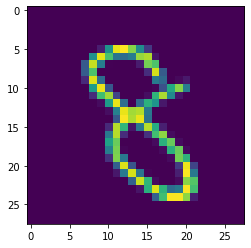

In [50]:
# Visualization of MNIST Dataset
import matplotlib.pyplot as plt
import numpy

for i, data in enumerate(trainloader, 0):
  images = data[0]
  labels = data[1]

image = np.squeeze(images[0])
label = labels[0]
plt.imshow(image)
print(label)

In [4]:
# Build the NN
class NN(nn.Module):
  def __init__(self):
    super(NN, self).__init__()
    self.l1 = nn.Linear(28*28*1, 200)
    self.l2 = nn.Linear(200, 10)

  def forward(self, x):
    x = F.relu(self.l1(x))
    x = self.l2(x)
    return x

In [11]:
# Training the NN
model = NN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

# Training Loop
for batch_idx, data_target in enumerate(trainloader):
  data = data_target[0] # image (digit)
  target = data_target[1] # label
  # put images into vectors
  # A [2,2,2,2] matrix becomes [1,16] vector of dim = 2
  data = data.view(-1, 28*28) # Flattens and changes the dimensions to [1*n]

  # Zero the parameter gradients - zero_grad() so not to accumulate gradients
  # from the previous iterations
  optimizer.zero_grad()

  # Forward + Backward + Optimize

  # Complete a forward pass
  output = model(data)
  # Compute loss, gradients and update weights
  loss = criterion(output, target)
  loss.backward()
  # Change weights
  optimizer.step()

In [98]:
# Set the model to eval mode (evaluation/test)
model.eval()
total = correct = 0

for i, data in enumerate(testloader, 0):
  inputs, labels = data
  inputs = inputs.view(-1, 28*28*1)

  # Forward pass to get the predictions
  outputs = model(inputs)
  # print(outputs.data)
  _, outputs = torch.max(outputs, 1) # Select Max probability from every output(row) 
  total += labels.size(0)
  correct += (outputs == labels).sum().item() # Compare with ground truth
print("Testing Accuracy: {}".format(100 * correct / total))

Testing Accuracy: 95.29
